In [1]:
import scanpy as sc
import os
import pandas as pd
import matplotlib as mpl
import sys
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import diffxpy.api as de
sys.path.append('/wsfish/glioblastoma/')
#import FISHspace as sp

%reload_ext autoreload
%autoreload 2

mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-06-08 22:00:02.217893: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 22:00:10.300011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_514819/3621006642.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt

In [2]:
folder = '../OrganoidAnalysis/GLM/model_poisson_timedistance_interaction/traces/'

In [3]:
files = [f for f in os.listdir(folder) if f.count('.nc')]

In [4]:
dic_q = {}

for g in files:
    trace = az.from_netcdf(os.path.join(folder, g))
    hyp_q = trace["posterior"]["hyp"].quantile([0.025,0.5, 0.975], dim=["chain", "draw"]).to_dataframe()
    pla_q = trace["posterior"]["plasma"].quantile([0.025,0.5, 0.975], dim=["chain", "draw"]).to_dataframe()
    hyppla_q = trace["posterior"]["hypoxia:plasma"].quantile([0.025,0.5, 0.975], dim=["chain", "draw"]).to_dataframe()
    dist2core_q = trace["posterior"]["dist2core"].quantile([0.025,0.5, 0.975], dim=["chain", "draw"]).to_dataframe()
    intercept_q = trace["posterior"]["Intercept"].quantile([0.025,0.5, 0.975], dim=["chain", "draw"]).to_dataframe()
    
    df = pd.concat([hyp_q, pla_q, hyppla_q, dist2core_q, intercept_q], axis=1)
    dic_q[g.split('.nc')[0]] = df   
    
df_q = pd.concat(dic_q)   


In [5]:
df_q

hyp    plasma  hypoxia:plasma  dist2core  Intercept
       quantile                                                          
MGST1  0.025     0.091544 -0.551007        0.827015  -0.832708   0.847744
       0.500     0.104695 -0.534084        0.850608  -0.809476   0.857617
       0.975     0.118468 -0.516904        0.873609  -0.786235   0.867683
SPON1  0.025    -2.013733 -0.576060        2.688622  -0.501530  -1.460599
       0.500    -1.949767 -0.538539        2.770751  -0.467902  -1.433501
...                   ...       ...             ...        ...        ...
CEMIP2 0.500    -1.313493  0.421176       -0.658688  -1.109935  -0.495194
       0.975    -1.272637  0.448592       -0.604896  -1.057924  -0.476493
HIF1A  0.025    -0.409011 -0.106537        0.006048   0.155078   1.223419
       0.500    -0.401752 -0.100362        0.017640   0.165343   1.230369
       0.975    -0.393821 -0.093782        0.028915   0.175215   1.237065

[444 rows x 5 columns]

In [6]:
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.minor.pad'] = 2
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.minor.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2


In [7]:
mpl.rcParams['xtick.labelsize'] = 28
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['font.size'] = 22
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.minor.pad'] = 2
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.minor.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

#mpl.rcParams['font.style'] = 'l' 
#matplotlib.rc('ytick', labelsize=20) 

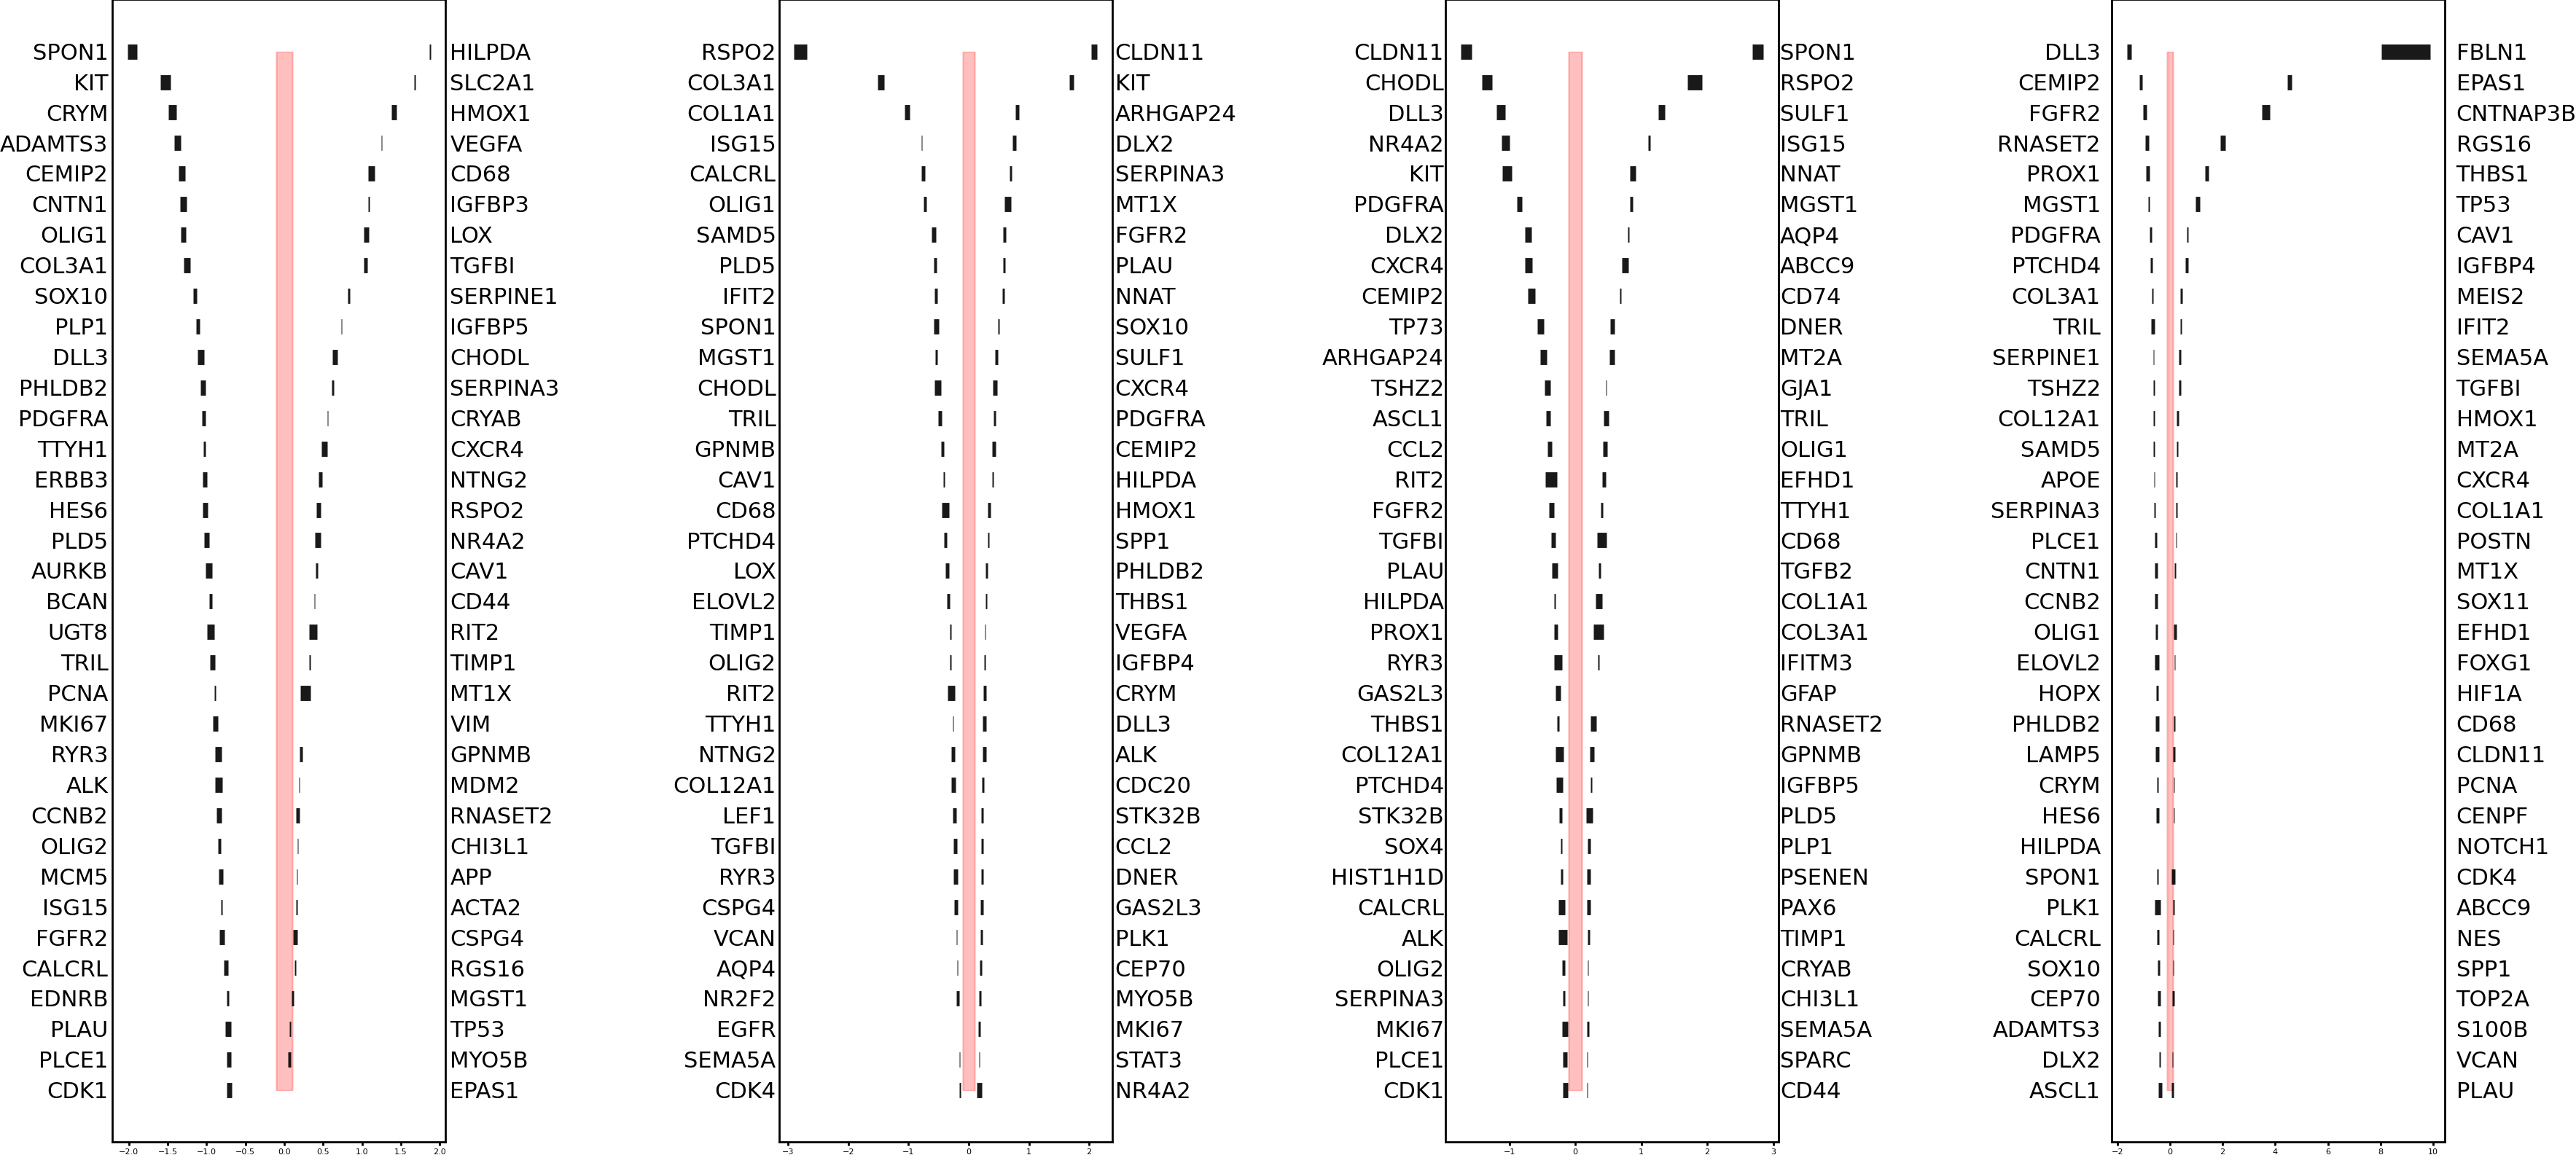

In [69]:
#Whole plot model
fig = plt.figure(figsize=(40,16))
gs = fig.add_gridspec(
    1,
    4,
    width_ratios=(1,1,1,1),
    left=0.1,
    right=0.9,
    bottom=0.01,
    top=0.99,
    wspace=1,
    hspace=0.05,
)

genes= 35

# Create the Axes.
df_05 = df_q.xs(.5, level=1)
df_975 = df_q.xs(.975, level=1)
df_025 = df_q.xs(.025, level=1)

df_order = df_05['hyp'].values.argsort()[::-1]

df_order25_25 = df_order.tolist()[-genes:][::-1] + df_order[:genes].tolist()[::-1]
positions_y = np.array(np.arange(genes).tolist()[::-1] + np.arange(genes).tolist())
df_05_ = df_05.loc[df_05.index.values[df_order25_25],:]
df_975_ = df_975.loc[df_05.index.values[df_order25_25],:]
df_025_ = df_025.loc[df_05.index.values[df_order25_25],:]

offset_y = .25
ax = fig.add_subplot(gs[0, 0])
ax.hlines(
    positions_y,
    df_025_['hyp'].values,
    df_975_['hyp'].values,
    color="black",
    lw=15,
    alpha=0.9,
)

text1_x = np.ones([genes])* (df_025_['hyp'].values.min() - .25 )
text2_x = np.ones([genes])* (df_975_['hyp'].values.max() + .25 )
text_x = text1_x.tolist() + text2_x.tolist()

count = 0
for y,x,t in zip(positions_y, text_x, df_05.index.values[df_order25_25]):
    ha = 'right'
    
    if count >= genes:
        ha = 'left'
    ax.text(x,y-offset_y,t, horizontalalignment=ha,)
    count += 1
    
ax.fill_betweenx([x for x in range(genes)] + [x for x in range(genes)] , -0.1, 0.1, alpha=0.25, color="red", )
ax.set_yticks([])
###
df_order = df_05['plasma'].values.argsort()[::-1]
df_order25_25 = df_order.tolist()[-genes:][::-1] + df_order[:genes].tolist()[::-1]
positions_y = np.arange(genes).tolist()[::-1] + np.arange(genes).tolist()
df_05_ = df_05.loc[df_05.index.values[df_order25_25],:]
df_975_ = df_975.loc[df_05.index.values[df_order25_25],:]
df_025_ = df_025.loc[df_05.index.values[df_order25_25],:]
ax = fig.add_subplot(gs[0, 1])
ax.hlines(
    positions_y,
    df_025_['plasma'].values,
    df_975_['plasma'].values,
    color="black",
    alpha=0.9,
    lw=15,
)
text1_x = np.ones([genes])* (df_025_['plasma'].values.min() - .3 )
text2_x = np.ones([genes])* (df_975_['plasma'].values.max() + .3 )
text_x = text1_x.tolist() + text2_x.tolist()
count = 0
for y,x,t in zip(positions_y, text_x, df_05.index.values[df_order25_25]):
    ha = 'right'
    if count >= genes:
        ha = 'left'
    ax.text(x,y-offset_y,t, horizontalalignment=ha,)
    count += 1
ax.fill_betweenx([x for x in range(genes)] + [x for x in range(genes)] , -0.1, 0.1, alpha=0.25, color="red", )
ax.set_yticks([])
###
df_order = df_05['hypoxia:plasma'].values.argsort()[::-1]
df_order25_25 = df_order.tolist()[-genes:][::-1] + df_order[:genes].tolist()[::-1]
positions_y = np.arange(genes).tolist()[::-1] + np.arange(genes).tolist()
df_05_ = df_05.loc[df_05.index.values[df_order25_25],:]
df_975_ = df_975.loc[df_05.index.values[df_order25_25],:]
df_025_ = df_025.loc[df_05.index.values[df_order25_25],:]
ax = fig.add_subplot(gs[0, 2])
ax.hlines(
    positions_y,
    df_025_['hypoxia:plasma'].values,
    df_975_['hypoxia:plasma'].values,
    color="black",
    alpha=0.9,
    lw=15,
)
text1_x = np.ones([genes])* (df_025_['hypoxia:plasma'].values.min() - .25 )
text2_x = np.ones([genes])* (df_975_['hypoxia:plasma'].values.max() + .25 )
text_x = text1_x.tolist() + text2_x.tolist()
count = 0
for y,x,t in zip(positions_y, text_x, df_05.index.values[df_order25_25]):
    ha = 'right'
    if count >= genes:
        ha = 'left'
    ax.text(x,y-offset_y,t, horizontalalignment=ha,)
    count += 1
ax.fill_betweenx([x for x in range(genes)] + [x for x in range(genes)] , -0.1, 0.1, alpha=0.25, color="red", )
ax.set_yticks([])
###
df_order = df_05['dist2core'].values.argsort()[::-1]
df_order25_25 = df_order.tolist()[-genes:][::-1] + df_order[:genes].tolist()[::-1]
positions_y = np.arange(genes).tolist()[::-1] + np.arange(genes).tolist()
df_05_ = df_05.loc[df_05.index.values[df_order25_25],:]
df_975_ = df_975.loc[df_05.index.values[df_order25_25],:]
df_025_ = df_025.loc[df_05.index.values[df_order25_25],:]
ax = fig.add_subplot(gs[0, 3])
ax.hlines(
    positions_y,
    df_025_['dist2core'].values,
    df_975_['dist2core'].values,
    color="black",
    alpha=0.9,
    lw=15,
)
text1_x = np.ones([genes])* (df_025_['dist2core'].values.min() - 1 )
text2_x = np.ones([genes])* (df_975_['dist2core'].values.max() + 1 )
text_x = text1_x.tolist() + text2_x.tolist()
count = 0
for y,x,t in zip(positions_y, text_x, df_05.index.values[df_order25_25]):
    ha = 'right'
    if count >= genes:
        ha = 'left'

    ax.text(x,y-offset_y,t, horizontalalignment=ha,)
    count += 1
ax.fill_betweenx([x for x in range(genes)] + [x for x in range(genes)] , -0.1, 0.1, alpha=0.25, color="red", )
ax.set_yticks([])
plt.savefig("figures/HistogramGLMintercept_complete.pdf")


# Plot together

In [8]:
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['font.size'] = 22
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.minor.pad'] = 2
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.minor.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

#mpl.rcParams['font.style'] = 'l' 
#matplotlib.rc('ytick', labelsize=20) 

In [61]:
adata_full = sc.read_h5ad('../OrganoidAnalysis/integration/GBMOrganoids_scVIsurgery20240408.h5ad')
adata_full.X = adata_full.raw.X
sc.pp.normalize_total(adata_full, target_sum=1e4)
#sc.pp.log1p(adata_full)

df = pd.DataFrame(data=adata_full.X.toarray(), columns=adata_full.var_names)
df['Condition'] = adata_full.obs.condition.values
df['Time'] = [t if t == '000h' or t == '144h' else '24/72h' for t in adata_full.obs.time]

df = pd.DataFrame(data=adata_full.X.toarray(), columns=adata_full.var_names)
df['Condition'] = adata_full.obs.condition.values
time_dic = {'000h':0, '024h':1, '072h':3, '144h':6}
df['Time'] = np.array([time_dic[t] for t in adata_full.obs.time.values])
df['line'] = adata_full.obs.line.values

initial = df[df['Condition'] == 'initial']
initial1 = initial.copy()
initial2 = initial.copy()
initial3 = initial.copy()

initial1['Condition'] = 'hyp'
initial2['Condition'] = 'hyppla'
initial3['Condition'] = 'pla'

df = df[df['Condition'] != 'initial']
df = pd.concat([df, initial1, initial2, initial3])

In [63]:
x = 'SERPINA3'
df[x][(df['Time'].isin([1,3])) & (df['Condition'] == 'hyp')].mean() / df[x][(df['Time'].isin([0,6])) &  (df['Condition'] == 'hyp')].mean()

1.2950729

/tmp/ipykernel_514819/2392894203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_05['hypoxia:plasma2'] = df_05['hypoxia:plasma'] + df_05['hyp'] + df_05['plasma']


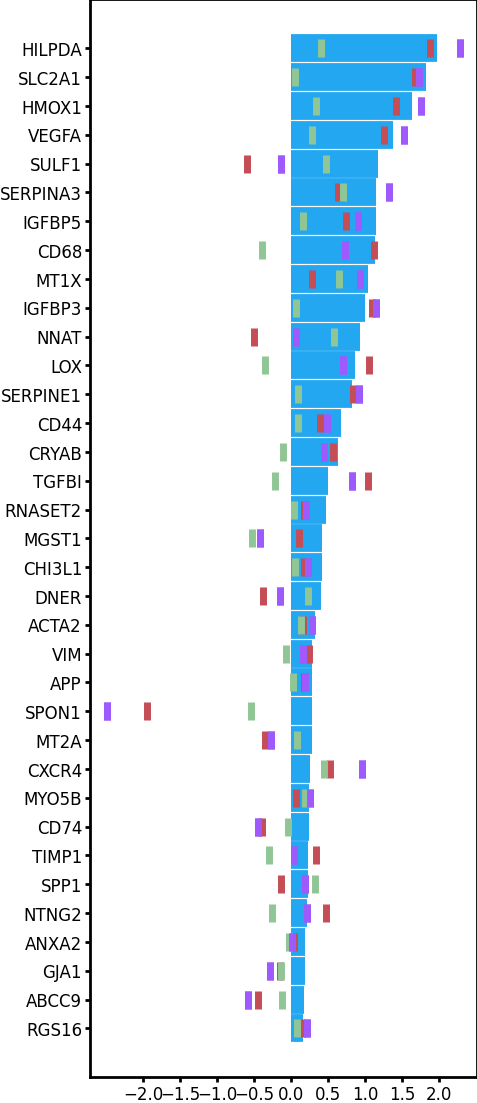

In [69]:
#Whole plot model
fig = plt.figure(figsize=(5,14))
genes= 35
# Create the Axes.
ax = fig.add_subplot(111)

df_05 = df_q.xs(.5, level=1)
df_05['hypoxia:plasma2'] = df_05['hypoxia:plasma'] + df_05['hyp'] + df_05['plasma']

df_order = df_05['hypoxia:plasma2'].values.argsort()[::-1]
df_order25_25 = df_order.tolist()[:genes]
positions_y = np.arange(genes).tolist()[::-1]
df_05_ = df_05.loc[df_05.index.values[df_order25_25],:]

color_dic = {'hyp':'#c44d56', 'plasma':'#90c695', 'hypoxia:plasma2':'#22a7f0'}
for x, y in zip(df_05_.index, positions_y):
    relative_changeH = df[x][(df['Time'].isin([1,3])) & (df['Condition'] == 'hyp')].mean() / df[x][(df['Time'].isin([0,6])) &  (df['Condition'] == 'hyp')].mean()
    relative_changeP = df[x][(df['Time'].isin([1,3])) & (df['Condition'] == 'pla')].mean() / df[x][(df['Time'].isin([0,6])) &  (df['Condition'] == 'pla')].mean()
    relative_changeHP = df[x][(df['Time'].isin([1,3])) & (df['Condition'] == 'hyppla')].mean() / df[x][(df['Time'].isin([0,6])) &  (df['Condition'] == 'hyppla')].mean()

    ls = df_05_.loc[x,['hypoxia:plasma2','hyp', 'plasma']].values
    order_c = np.array(['hypoxia:plasma2','hyp', 'plasma'])#[ls.argsort()]
    
    alphas = [1, 1, 1]
    widths = [20, 15, 15]
    start = 0
    zord = 0
    for val, c, a, w in zip(ls, order_c, alphas, widths):
        if c == 'hyp' or c =='plasma':
            ax.scatter(
                val,
                y,
                s=150,
                color=color_dic[c],
                zorder=zord,
                linewidths=5,
                marker = '|',
                
            )
            
            valcomb = df_05_.loc[x,['hyp', 'plasma']].sum()
            ax.scatter(
                valcomb,
                y,
                s=150,
                color='#9f5afd',
                zorder=zord,
                marker='|',
                linewidths=5,
            )
            
            '''
            ax.scatter(
                relative_changeH,
                y,
                s=50,
                color=color_dic['hyp'],
                zorder=zord,
                marker='|'
            )

            ax.scatter(
                relative_changeP,
                y,
                s=50,
                color=color_dic['plasma'],
                zorder=zord,
                marker='|'
            )

            ax.scatter(
                relative_changeHP,
                y,
                s=50,
                color=color_dic['hypoxia:plasma2'],
                zorder=zord,
                marker='|'
            )
            '''
        
            
        else:
            if val <= 0:
                ax.hlines(
                    y,
                    val,
                    0,
                    color=color_dic[c],
                    alpha=a,
                    lw=20,
                    zorder=zord
                )

            elif val > 0:
                ax.hlines(
                    y,
                    0,
                    val,
                    color=color_dic[c],
                    alpha=a,
                    lw=20,
                    zorder=zord
                )

        zord +=1

ax.set_xticks([-2, -1.5, -1,-.5, 0., .5, 1, 1.5, 2],)
ax.set_yticks(positions_y, labels=df_05.index.values[df_order25_25].tolist(), )
plt.savefig("figures/HistogramGLMinteraction_positive.pdf")


/tmp/ipykernel_514819/4088789465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_05['hypoxia:plasma2'] = df_05['hypoxia:plasma'] + df_05['hyp'] + df_05['plasma']


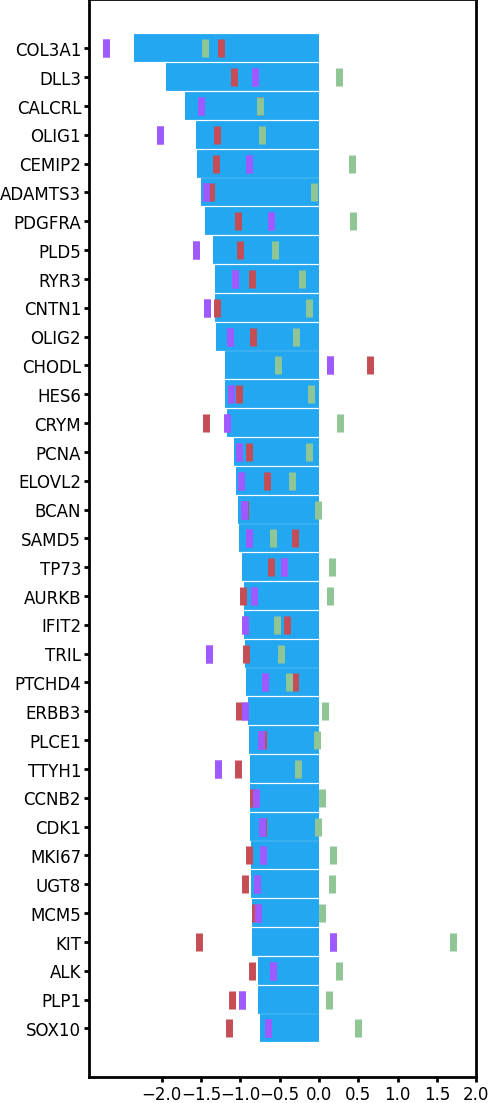

In [70]:
#Whole plot model
fig = plt.figure(figsize=(5,14))
genes= 35
# Create the Axes.
ax = fig.add_subplot(111)

df_05 = df_q.xs(.5, level=1)
df_05['hypoxia:plasma2'] = df_05['hypoxia:plasma'] + df_05['hyp'] + df_05['plasma']

df_order = df_05['hypoxia:plasma2'].values.argsort()#[::-1]
df_order25_25 = df_order.tolist()[:genes]
positions_y = np.arange(genes).tolist()[::-1]
df_05_ = df_05.loc[df_05.index.values[df_order25_25],:]

color_dic = {'hyp':'#c44d56', 'plasma':'#90c695', 'hypoxia:plasma2':'#22a7f0'}
for x, y in zip(df_05_.index, positions_y):
    relative_changeH = df[x][(df['Time'].isin([1,3])) & (df['Condition'] == 'hyp')].mean() / df[x][(df['Time'].isin([0,6])) &  (df['Condition'] == 'hyp')].mean()
    relative_changeP = df[x][(df['Time'].isin([1,3])) & (df['Condition'] == 'pla')].mean() / df[x][(df['Time'].isin([0,6])) &  (df['Condition'] == 'pla')].mean()
    relative_changeHP = df[x][(df['Time'].isin([1,3])) & (df['Condition'] == 'hyppla')].mean() / df[x][(df['Time'].isin([0,6])) &  (df['Condition'] == 'hyppla')].mean()

    ls = df_05_.loc[x,['hypoxia:plasma2','hyp', 'plasma']].values
    order_c = np.array(['hypoxia:plasma2','hyp', 'plasma'])#[ls.argsort()]
    
    alphas = [1, 1, 1]
    widths = [20, 15, 15]
    start = 0
    zord = 0
    for val, c, a, w in zip(ls, order_c, alphas, widths):
        if c == 'hyp' or c =='plasma':
            ax.scatter(
                val,
                y,
                s=150,
                color=color_dic[c],
                zorder=zord,
                linewidths=5,
                marker = '|',
                
            )
            
            valcomb = df_05_.loc[x,['hyp', 'plasma']].sum()
            ax.scatter(
                valcomb,
                y,
                s=150,
                color='#9f5afd',
                zorder=zord,
                marker='|',
                linewidths=5,
            )
            
            '''
            ax.scatter(
                relative_changeH,
                y,
                s=50,
                color=color_dic['hyp'],
                zorder=zord,
                marker='|'
            )

            ax.scatter(
                relative_changeP,
                y,
                s=50,
                color=color_dic['plasma'],
                zorder=zord,
                marker='|'
            )

            ax.scatter(
                relative_changeHP,
                y,
                s=50,
                color=color_dic['hypoxia:plasma2'],
                zorder=zord,
                marker='|'
            )
            '''
        
            
        else:
            if val <= 0:
                ax.hlines(
                    y,
                    val,
                    0,
                    color=color_dic[c],
                    alpha=a,
                    lw=20,
                    zorder=zord
                )

            elif val > 0:
                ax.hlines(
                    y,
                    0,
                    val,
                    color=color_dic[c],
                    alpha=a,
                    lw=20,
                    zorder=zord
                )

        zord +=1

ax.set_xticks([-2, -1.5, -1,-.5, 0., .5, 1, 1.5, 2],)
ax.set_yticks(positions_y, labels=df_05.index.values[df_order25_25].tolist(), )
plt.savefig("figures/HistogramGLMinteraction_negative.pdf")
